

# **Predicting Airline Customer Satisfaction**
## Phase 1: Data Preparation & Visualisation


<center> Names & IDs of group members </center> 

Names  | IDs
------------- | -------------
Matthew Bentham  | S3923076
John Murrowood  | S3923075
Isxaq Warsame  |  S3658179



__________

### Table of contents:
- [Introduction](#intro)
   - [Data source](#ds)
   - [Dataset detail](#dd)
   - [Dataset features](#df)
   - [Target Feature](#tf)
- [Goals & Objectives](#gao) 
- [Data Cleaning & Preprocessing](#dprep)
- [Data Exploration & Visualisation](#dvis)
   - [One Variable Plots](#1v)
   - [Two Variable Plots](#2v)
   - [Three Variable Plots](#3v)
- [Literature Review](#lr)
- [Summary & Conclusions](#sum)
- [References](#ref)


### INTRODUCTION <a name="intro"></a>

#### **Data source:** <a name="ds"></a>

The US airline passenger satisfaction survey dataset was sourced from kaggle, uploaded by John D 2018. This dataset contains survey results for whether a customer was satisfied with the flight or not as well as passenger and flight information. The dataset also contains information on what parts of the flight service they were satisfied with or not satisifed with.

URL: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction)

#### **Dataset details:** <a name="dd"></a>

This dataset contains information on whether customers were satisfied or not during there domestic flight within the USA. There is personal details of each traveller including age, gender, type of travel (personal or buisness), as well as information on the flight including in-flight duration, gate departure and if the flight was delayed. There is also a rating for which cutomers enjoyed certain aspects of the flight such as inflight wifi, cleanliness, leg room and other things. These features will then be used for a classification problem to predict the target feature of whether a customer will be satisfied or not.

The dataset has 24 features, split into descriptive features and survey response features, including the target feature and 129,880 observations before any pre processing is preformed on the dataset.

##### **Dataset Retieval**
- The data was downloaded from kaggle as a xlsx file. Link: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction) 
- As the data file is in the same github directory as this report 'satisfaction.xlsx' can be read directly 
- The first 10 rows are displayed 

In [271]:
# Reading in required packages, and setting up warnings filter
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate



df_name  = 'satisfaction.xlsx'
df = pd.read_excel(df_name)
print(f'Rows in Dataset: {len(df)}')
df.head(10)


Rows in Dataset: 129880


,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,2,4,5,3,4,2,30,26.0




#### **Dataset features:** <a name="df"></a>



The 24 input Descriptive features: 
- **Age**:  The actual age of the passengers 
- **ID**:   Passenger id unique ID number
- **Gender**:   Gender of the passengers (Female, Male)
- **Type of Travel**:   Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Customer Type**: The customer type (Loyal customer, disloyal customer)
- **Flight distance**: The flight distance of this journey 
- **Flight cancelled**: Whether the Flight cancelled or not (Yes, No)
- **Departure Delay in Minutes (m)**: Minutes delayed when departure 
- **Arrival Delay in Minutes (m)**: Minutes delayed when Arrival, Int 

**Survery response features:** Satisfaction level , Int , On a scale of [0,5]
- Ordinal in nature, the meaning of the numbers is listed below and below that are the response features themselves.
- **0** being **Not Applicable**, All rows contianing '0' will be removed as they are not applicable to the analysis,
- **1** being **Very Dissatisfied**,
- **2** being **Dissatisfied**,
- **3** being **Neutral**,
- **4** being **Satisfied**,
- **5** being **Very Satisfied**
- **The Survey Response Features are listed below:**
  -  Inflight wifi service 
  -  Inflight service
  -  Online boarding
  -  Ease of Online booking
  -  Inflight entertainment
  -  Food and drink
  -  Seat comfort
  -  On-board service
  -  Leg room service
  -  Departure/Arrival time
  -  Baggage handling
  -  Gate location
  -  Cleanliness
  -  Check-in service


In [272]:
# Creating table of features
table = [['Name','Data Type','Units','Description'],
         ['Age', 'Numeric', 'Integer','The actual age of the passengers'],
         ['ID', 'Nominal', 'Integer', 'Passenger identifier, unique ID number'],
         ['Gender', 'Binary', 'Male or Female', 'Gender of the passengers (Female, Male)'],
         ['Type of Travel', 'Nominal Categorical', 'Personal or Business', 'Purpose of the flight of the passengers (Personal Travel, Business Travel)'],
         ['Class', 'Nominal Categorical', 'Business, Eco or Eco Plus', 'Travel class in the plane of the passengers (Business, Eco, Eco Plus)' ],
         ['Customer Type', 'Nominal Categorical', 'Loyal Customer or Disloyal Customer', 'The type of customer and how loyal they are to the airline'],
         ['Flight Distance','Numeric', 'Integer, Km', 'The flight distance of the journey in Kilometers (km)' ],
         ['Flight Cancelled', 'Nominal Categorical', 'Boolean, Yes or No', ' Whether the Flight was cancelled or not (yes or no)'  ],
         ['Departure Delay', 'Numeric', 'Integer, Minutes', 'Minutes delayed at departure, e.g, Delay in minutes before aircraft takes-off ' ],
         ['Arrival Delay', 'Numeric', 'Integer, Minutes', 'Minutes Delayed at arrival, e.g, Delay in minutes before aircraft lands']
         ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤═════════════════════╤═════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════╕
│ Name             │ Data Type           │ Units                               │ Description                                                                   │
╞══════════════════╪═════════════════════╪═════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════╡
│ Age              │ Numeric             │ Integer                             │ The actual age of the passengers                                              │
├──────────────────┼─────────────────────┼─────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────┤
│ ID               │ Nominal             │ Integer                             │ Passenger identifier, unique ID number                                        │
├──────────────────┼──────────────



#### **Target Feature:** <a name="tf"></a>

- 'satisfied' : The airline customer was satisfied with their cumulative experience.
- 'neutral or dissastisfied: The airline customer was NOT satisfied with their cumulative experience.


The target feature for this project is the satisfaction level of the airline customers , meaning the supervised learning task contain a binary target that defines whether or not an airline customer is satsified (Satisfied , neutral/dissatisfied) based off the descriptive variables.




### Goals & Objectives: <a name="gao"></a>

The airline industry is extremely competetive with lots of various running costs and often very fine profit margins. Therefore, these airline surveys are important as they can be used to generate models that are able to predict what the most important features of an airlines service are. Once the significant features are determined they can be used to ascertain what is important to passenger. This allows an airline to priotise spending into specific sectors of thier buisness and ensures they are able to offer the best service that is tailored the largest number of people and which parts of ther service offering they can cut down costs on while ensuring minimal impact on customer satisfaction.

*The Main objectives of this project are as follows:*
1. Identify the features that act as the best predictors for customer satisfaction in airlines. 
2. Subsequently, identify which features can be cut down on to increase profit margins.
3. Predict whether a customer is satisfied with thier airline experience based on basic customer features and survey response awnsers.




### Data Cleaning & Preprocessing: <a name="dprep"></a>


##### Data Cleaning Steps: <a name = "prepsteps"></a>
- Check datatypes and data quality issues 
- Check for outliers and missing values 
- Remove redundant features
- Rename columns
- Randomly sample data 

In [273]:
# CHECK COLUMN NAMES
df.columns


Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

The column containing the target feature (satissfaction) is named irregularly , additionally the id column is a redunant fetaure as it is purely used to uniquely identify passenegers and therefore has no use in a machine learning dataset.

In [274]:
# Renaming columns for consistency
df=df.rename(columns={'satisfaction_v2':'Satisfaction',
                        'id': 'Id',
                      'Seat comfort'    : 'Seat Comfort',
            'Departure/Arrival time convenient' : 'Departure/Arrival Time Convenient',
             'Food and drink' : 'Food and Drink',
             'Gate location' : 'Gate Location' ,
            'Inflight wifi service' : 'Inflight Wifi Service',
             'Inflight entertainment' : 'Inflight Entertainment' ,
             'Online support' : 'Online Support',
            'Ease of Online booking' : 'Ease of Online Booking',
             'On-board service' : 'On-board Service',
             'Leg room service' : 'Leg Room Service',
            'Baggage handling' : 'Baggage Handling',
             'Checkin service' : 'Check-in Service',
             'Cleanliness' : 'Cleanliness',
             'Online boarding': 'Online Boarding'})

# Setting new order of cols, moved target variable 'Satisfaction' to the back
new_cols = ['Id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance','Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Seat Comfort',
       'Departure/Arrival Time Convenient', 'Food and Drink', 'Gate Location',
       'Inflight Wifi Service', 'Inflight Entertainment', 'Online Support',
       'Ease of Online Booking', 'On-board Service', 'Leg Room Service',
       'Baggage Handling', 'Check-in Service', 'Cleanliness',
       'Online Boarding', 'Satisfaction']


df=df.reindex(columns=new_cols) # reorder columns so target feature is at the end 

airplane_df = df.drop(columns=["Id"])   # Dropping Id as its unnecessary for our needs

Check data types:

In [275]:
print(airplane_df.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfacti

As the departure delay in minutes is a continuous variable, the corresponding datatype should be float. Otherwise all remaining features have the correct corresponding datatype.

In [276]:
# Changing data type of 'Depature Delay in Minutes from int to float
airplane_df['Departure Delay in Minutes'] = airplane_df['Departure Delay in Minutes'].astype(float)
print(airplane_df.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfacti

As 0 represents not applicable, any rows containing this value, specifically in the columns listed below will be removed: -
-  Inflight wifi service
-  Inflight service
-  Online boarding
-  Online Support
-  Ease of Online booking
-  Inflight entertainment
-  Food and drink
-  Seat comfort
-  On-board service
-  Leg room service
-  Departure/Arrival time
-  Baggage handling
-  Gate location
-  Cleanliness
-  Check-in service


In [277]:
# Setting columns to be worked on
cols = ['Seat Comfort', 'Departure/Arrival Time Convenient',
       'Food and Drink', 'Gate Location', 'Inflight Wifi Service',
       'Inflight Entertainment', 'Online Support', 'Ease of Online Booking',
       'On-board Service', 'Leg Room Service', 'Baggage Handling',
       'Check-in Service', 'Cleanliness', 'Online Boarding']


drops = []  # This list will hold the index of rows to be dropped

# looping through df using the selected cols and appending the index if the value is equal to 0
for i in airplane_df[cols].iterrows():  
    for j in i[1]:
        if j == 0:
            drops.append(i[0])


print(f'Number of rows to be dropped: {len(drops)}')

Number of rows to be dropped: 21006


As the number of rows contianing a '0' is only 21,006, it is insignificant in number and will therefore have minimal effect on the outcomes of the analysis

In [278]:
# Dropping the rows containing the 0 using its index
airplane_df.drop(airplane_df.index[drops], inplace=True )


In [279]:
# Checking the df to see the changes have occured
for i in airplane_df[cols].columns:
    x = airplane_df[i].value_counts()
    print("Column name is:",i,"and it value is:",'\n',x)

Column name is: Seat Comfort and it value is: 
 3    28145
2    27619
4    27088
1    19723
5    17036
Name: Seat Comfort, dtype: int64
Column name is: Departure/Arrival Time Convenient and it value is: 
 4    28280
5    25561
3    22754
2    22548
1    20468
Name: Departure/Arrival Time Convenient, dtype: int64
Column name is: Food and Drink and it value is: 
 3    27276
2    26293
4    26167
1    20276
5    19599
Name: Food and Drink, dtype: int64
Column name is: Gate Location and it value is: 
 3    30591
4    27580
2    22560
1    20643
5    18237
Name: Gate Location, dtype: int64
Column name is: Inflight Wifi Service and it value is: 
 4    29374
5    26652
3    25384
2    24909
1    13292
Name: Inflight Wifi Service, dtype: int64
Column name is: Inflight Entertainment and it value is: 
 4    39660
5    28040
3    22941
2    18081
1    10889
Name: Inflight Entertainment, dtype: int64
Column name is: Online Support and it value is: 
 4    38810
5    33037
3    19799
2    15581
1   

- Below some of the value names are changed for consistency and to ensure clarity

In [280]:
# Changing the value names of some values for clarity
airplane_df['Customer Type'] = airplane_df['Customer Type'].replace('disloyal Customer', 'Disloyal')
airplane_df['Customer Type'] = airplane_df['Customer Type'].replace('Loyal Customer', 'Loyal')
airplane_df['Type of Travel'] = airplane_df['Type of Travel'].replace('Personal Travel', 'Personal')
airplane_df['Type of Travel'] = airplane_df['Type of Travel'].replace('Business travel', 'Business')
airplane_df['Satisfaction'] = airplane_df['Satisfaction'].replace('neutral or dissatisfied', 'Dissatisfied')
airplane_df['Satisfaction'] = airplane_df['Satisfaction'].replace('satisfied', 'Satisfied')

To avoid future discrepancies , the unique values for each categorical feature is displayed to check for whitespaces , case errors ect. 

In [281]:

Objectdata = airplane_df.columns[airplane_df.dtypes==object].tolist()
print('Variable','|'.center(15), 'Unique values')
print('----------------------------------------')
for x in Objectdata:
    print(x,'|'.rjust(16-len(x)),airplane_df[x].unique())

Variable        |        Unique values
----------------------------------------
Gender          | ['Male' 'Female']
Customer Type   | ['Loyal' 'Disloyal']
Type of Travel  | ['Personal' 'Business']
Class           | ['Eco' 'Business' 'Eco Plus']
Satisfaction    | ['Dissatisfied' 'Satisfied']


As seen above no discrepancies were found in the categorical data features.

Missing values are displayed: 
- As 356 rows only account for 0.3% of the data, it can be removed without causing any substantial impact to the overall dataset 

In [282]:
print(f'Total Number of Missing Values: {airplane_df.isnull().sum(axis=1).sum()}')
airplane_df.isnull().sum(axis=0)

Total Number of Missing Values: 356


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             356
Seat Comfort                           0
Departure/Arrival Time Convenient      0
Food and Drink                         0
Gate Location                          0
Inflight Wifi Service                  0
Inflight Entertainment                 0
Online Support                         0
Ease of Online Booking                 0
On-board Service                       0
Leg Room Service                       0
Baggage Handling                       0
Check-in Service                       0
Cleanliness                            0
Online Boarding                        0
Satisfaction                           0
dtype: int64

In [283]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
airplane_df = airplane_df.dropna()  # Dropping Missing Values


print(f'\nTotal Number of Missing Values: {airplane_df.isnull().sum(axis=1).sum()}')    # Verifying the change has occured



print(airplane_df.isnull().sum())   # Verifying they have been removed



Number of missing values for each column/ feature:

Total Number of Missing Values: 0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Seat Comfort                         0
Departure/Arrival Time Convenient    0
Food and Drink                       0
Gate Location                        0
Inflight Wifi Service                0
Inflight Entertainment               0
Online Support                       0
Ease of Online Booking               0
On-board Service                     0
Leg Room Service                     0
Baggage Handling                     0
Check-in Service                     0
Cleanliness                          0
Online Boarding                      0
Satisfaction                         0
dtype: int64


In order to check for outliers in the numeric data , the summary statistics for each is displayed

In [284]:
airplane_df.describe(include = ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,119255.0,39.856157,15.027477,7.0,28.0,40.0,51.0,59.0,64.0,70.0,85.0
Flight Distance,119255.0,1994.709144,1038.057310,50.0,1359.0,1941.0,2571.0,3426.0,3849.0,4854.0,6951.0
Departure Delay in Minutes,119255.0,14.824552,38.158017,0.0,0.0,0.0,12.5,44.0,77.0,180.0,1592.0
Arrival Delay in Minutes,119255.0,15.273758,38.679817,0.0,0.0,0.0,13.0,45.0,79.0,183.0,1584.0
Seat Comfort,119255.0,2.950451,1.297718,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Departure/Arrival Time Convenient,119255.0,3.132758,1.395171,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Food and Drink,119255.0,2.987455,1.331106,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Gate Location,119255.0,3.001828,1.311234,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Inflight Wifi Service,119255.0,3.260836,1.312094,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Inflight Entertainment,119255.0,3.467385,1.251510,1.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0


- Above, it is evident that there are outliers in the Flight Distance, Departure Delay in Minutes and Arrival Delay in Minutes.
- Although under normal circumstances these might not be removed, due to these features being important in being able to ascertain which features contribute most to satisfaction.
- However, higher delay times might lead to passengers disregarding the other features and soley basing their disatisfaction on the length of the delay.
- The only exception to this is flight distance. By keeping the outliers in flight distance we might be able to see a greater divide in what provides satisfaction to passengers as they are on the aircraft for longer.
- For this reason, only the outliers in Departure and Arrival delay will be removed.
- They will be removed using z score, any value more than 3 standard deviations (99.97%) away from the mean will be removed, for both the upper and lower bounds.

In [285]:

df = airplane_df.copy() # Copying df
standard_deviations = 3    # Setting how many std away from the mean we want to remove

# calculating the z score and then finding the absoloute value and then removing if more than 3 std away from mean
df = df[df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1)]   



In [286]:
# Confirming the outlier removal has taken place
df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].describe(include= ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Arrival Delay in Minutes,116463.0,10.83575,21.457425,0.0,0.0,0.0,12.0,37.0,60.0,103.0,131.0
Departure Delay in Minutes,116463.0,10.49074,21.200168,0.0,0.0,0.0,11.0,36.0,59.0,102.0,129.0


In [287]:
print(f'Dataframe shape before outlier removal: {airplane_df.shape}')
print(f'Dataframe shape after outlier removal: {df.shape}')
print(f'Number of rows contianing outliers removed: {airplane_df.shape[0] - df.shape[0]}')
airplane_df = df.copy()     # Changing back to airplane_df name

Dataframe shape before outlier removal: (119255, 23)
Dataframe shape after outlier removal: (116463, 23)
Number of rows contianing outliers removed: 2792


- As the data contains more than 5000 rows , in order to simplfy the dataset to make it less compuatationally intensive , 5000 randomly sampled rows are generated.

In [288]:
airplane_df = airplane_df.sample(n=5000, random_state=111)
print(f'Number of rows in df: {airplane_df.shape[0]}')  
print(f'Number of cols in df: {airplane_df.shape[1]}')
airplane_df.sample(10, random_state=111)

Number of rows in df: 5000
Number of cols in df: 23


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
103625,Female,Loyal,51,Business,Business,1036,8.0,3.0,5,2,...,4,5,4,4,4,4,3,4,5,Satisfied
18186,Female,Loyal,51,Personal,Business,607,0.0,0.0,4,4,...,5,5,4,4,4,4,5,4,4,Satisfied
15055,Male,Loyal,37,Personal,Eco,2103,0.0,0.0,2,4,...,2,2,5,3,4,5,5,5,5,Dissatisfied
78943,Male,Loyal,17,Business,Business,2392,33.0,29.0,2,2,...,3,2,2,3,5,5,4,5,2,Satisfied
26161,Female,Loyal,44,Personal,Eco,734,13.0,10.0,2,2,...,4,4,5,5,5,5,3,5,3,Satisfied
77250,Male,Loyal,33,Business,Business,3502,13.0,12.0,2,4,...,2,2,2,1,3,3,1,3,2,Dissatisfied
105860,Female,Loyal,60,Business,Business,414,31.0,42.0,2,2,...,4,4,4,4,4,4,5,4,5,Satisfied
111230,Male,Loyal,36,Business,Business,84,0.0,0.0,3,3,...,4,3,4,4,5,3,2,4,1,Satisfied
37153,Male,Loyal,37,Personal,Eco Plus,1798,0.0,0.0,4,5,...,4,5,5,1,4,2,1,5,5,Satisfied
28265,Female,Loyal,68,Personal,Eco,334,8.0,11.0,4,4,...,5,5,5,5,5,5,4,5,4,Satisfied


<span style='font-family:"Times New Roman"'> 

### Data Exploration & Visualisation: <a name="dvis"></a>
<span styel=''>

## Plotting Requirements for Phase 1


## Additional plotting instructions are as follows

1. For plotting, you a  re free to use whatever Python module you like: Matplotlib, Seaborn, Altair, Plotly, etc.
2. Your plots must be meaningful and they need to make sense with respect to the goals and objectives of your project.
3. As long as your plots are meaningful and relevant, there are no restrictions on the plot types. That is, you can have a mix of box-plots, histograms, line plots, scatter plots etc.
4. For each plot in your report, you will need to label the x- and y-axes as appropriate and also add a meaningful title.

## One-variable plots <a name="1v"></a>

### Figure 1: Histogram of Flight distance
- The histogram shows most of the flights are around the 2000km mark in distance 
- Histogram is skewed to the right with the majority flights less than 3000km flight distance
- The histogram is Bi-Modal with the first peak at 400km and the secon peak is at 1900km
- There is an outlier at about 6900 km


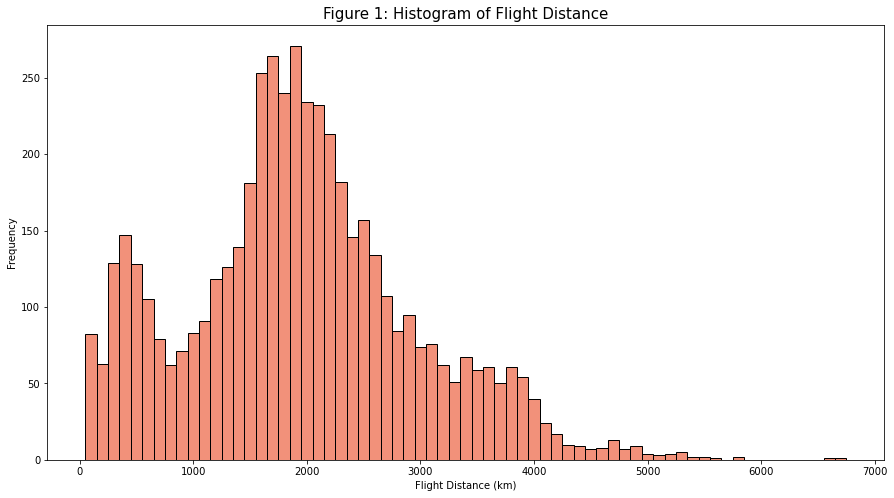

In [304]:
plt.figure(figsize = (15,8))
sns.histplot(airplane_df["Flight Distance"],kde = False,color=['#ee6c4d'], binwidth= 100).set(title = "Flight Distance Histogram", xlabel="Flight Distance (km)", ylabel="Frequency")
plt.title('Figure 1: Histogram of Flight Distance', fontsize = 15)

plt.show()

### Figure 2: Bar chart of satisfaction levels
- There is a roughly even split between satisfied and disatisfied
- There is 444 more satisfied survey respondants than not satisfied

<Figure size 1080x576 with 0 Axes>

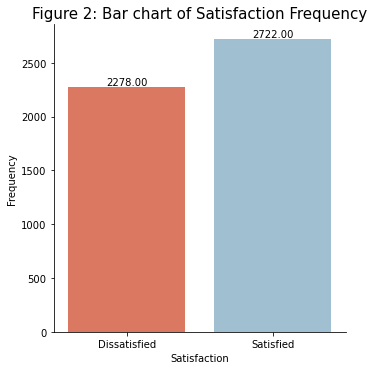

In [305]:
plt.figure(figsize = (15,8))
count = airplane_df.groupby(["Satisfaction"]).size().reset_index(name="Frequency")
g = sns.catplot(x = "Satisfaction", y = "Frequency", kind="bar", data=count,palette=['#ee6c4d', '#98c1d9'])
ax = g.facet_axis(0, 0)

# Adding Data Labels
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Figure 2: Bar chart of Satisfaction Frequency', fontsize = 15)
plt.show()

### Figure 3: Histogram of Passenger Age
- This is a bimodal histogram with the majority of passengers between 20 and 30 years old or around 40 years old
- The histogram shows roughly symetrical distribution of age among the passengers

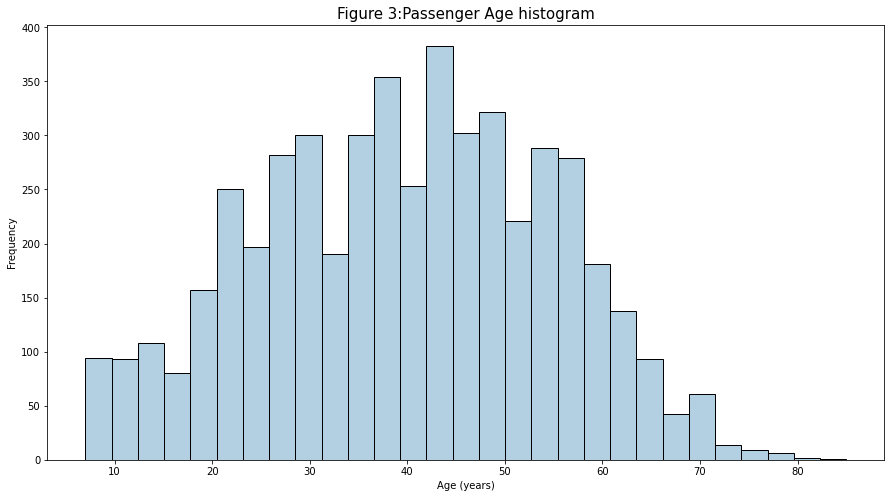

In [306]:
plt.figure(figsize = (15,8))
sns.histplot(airplane_df["Age"],kde = False,color="#98c1d9").set( xlabel="Age (years)", ylabel="Frequency")
plt.title('Figure 3:Passenger Age histogram', fontsize = 15)
plt.show()

### Figure 4: Bar Chart of Travel Type
- There is almost double the amount of passengers, 40%, travelling for business than those who are travelling for personal reasons.
- There is 1948 more business passengers than personal travellers.


<Figure size 1080x576 with 0 Axes>

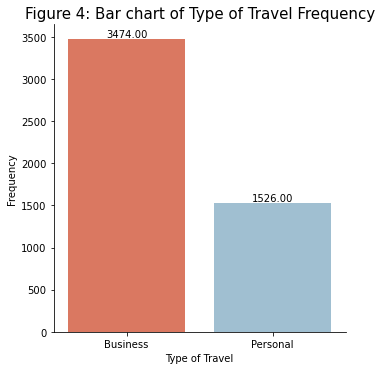

In [317]:
plt.figure(figsize = (15,8))
count = airplane_df.groupby(["Type of Travel"]).size().reset_index(name="Frequency")
g = sns.catplot(x = "Type of Travel", y = "Frequency", kind="bar", data=count,palette=['#ee6c4d', '#98c1d9'])
plt.title('Figure 4: Bar chart of Type of Travel Frequency', fontsize = 15)
ax = g.facet_axis(0, 0)

# Adding Data Labels
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

## Two-variable plots <a name="2v"></a>

### Figure 5: Box plot of Flight Distance by Satisfaction
- We can see that the dissatisfied, has a higher median than the satisfied boxplot with regard to Flight Distance.
  - This supports the hypothesis that longer flights lead to more time for passengers to become dissatisfied.
- The descriptive statistics show that there are less dissastisfied passengers (count = 2,278) than satisfied passengers (count = 2,722)
  - Their means are relatively the same with dissastisfied passengers having travelled on average 100km more than satisfied passengers. This also links back to the hypothesis of longer flight distances produce more dissastisfied passenegers.
  - There is a greater variance with regard to flight distance in satisfied passengers (std = 1126.32km) than dissastisfied passengers (std = 870.96km). This means that there is a greater spread in flight distance among satisfied passengers.
  - The most notable figure of the quartiles is the 1st quartile, the first quartile for satisfied passengers is 1,013.75km while for dissastisfied passengers it was 1533.25km. This also supports the hypothesis of longer flights lead to more dissastisfied passengers as it is clearly evident here that the less distance a passenger has to travel the more likely they are to be satisfied.
- In Figure 5, through visual analysis we can see that Flight Distance does not have a significant impact on satisfaction.


In [318]:
airplane_df['Flight Distance'].groupby(airplane_df['Satisfaction']).describe().T.applymap('{:,.2f}'.format)

Satisfaction,Dissatisfied,Satisfied
count,"2,278.00","2,722.00"
mean,"2,006.17","1,905.31"
std,870.96,"1,126.32"
min,55.00,50.00
25%,"1,533.25","1,013.75"
50%,"1,940.50","1,851.50"
75%,"2,426.25","2,603.75"
max,"6,595.00","6,734.00"


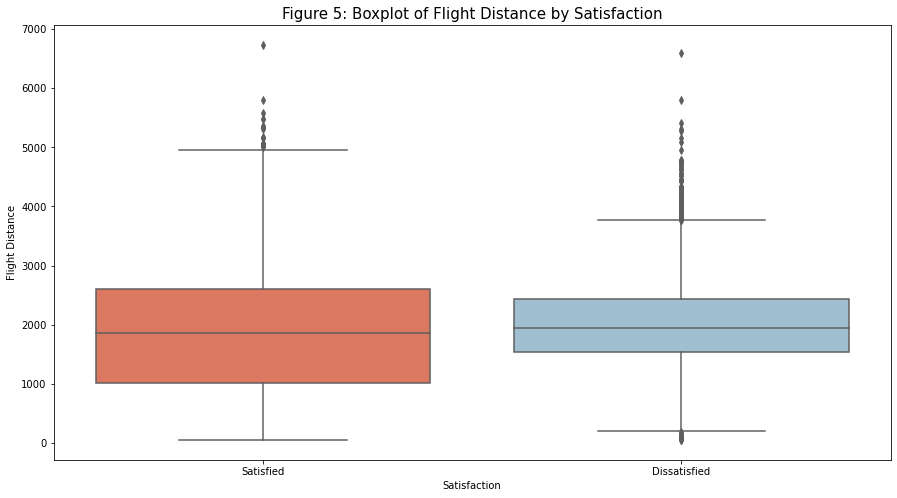

In [319]:
# Plotting satisfaction by flight distance
plt.figure(figsize = (15,8))
sns.boxplot(airplane_df['Satisfaction'], airplane_df['Flight Distance'],palette=['#ee6c4d', '#98c1d9'])
plt.title('Figure 5: Boxplot of Flight Distance by Satisfaction', fontsize = 15)
plt.show()

### Figure 6: Bar-Chart of Satisfaction by Class

- Passengers travelling in Business Class are more likely to be satisfied overall.
- Conversely, passengers travelling in economy are more likely to be dissastisfied.
- Passengers in economy plus vary less, with only a 92 person difference. 
- Therefore, it is evident that Economy Plus is not a deciding factor in Satisfaction whereas Business Class and Economy are deciding factors.

<Figure size 1080x576 with 0 Axes>

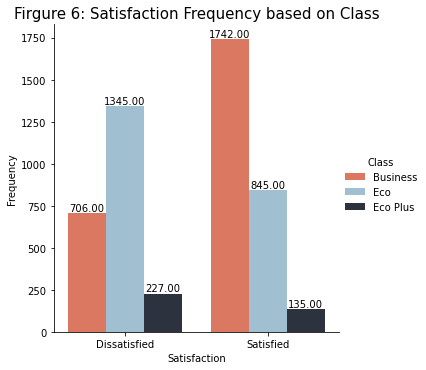

In [324]:
plt.figure(figsize = (15,8))
count = airplane_df.groupby(["Class", "Satisfaction"]).size().reset_index(name="Frequency")
g = sns.catplot(x = "Satisfaction", y = "Frequency",  hue= "Class", kind="bar", data=count,palette=['#ee6c4d', '#98c1d9',"#293241"])
plt.title('Firgure 6: Satisfaction Frequency based on Class', fontsize = 15);

ax = g.facet_axis(0, 0)

# Adding Data Labels
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show();

### Figure 7: Stacked Bar-Chart of Satisfaction by Customer type
- We can see that that Loyal customers have a much higher percentage of satisfied customers with 61.88% of loyal customers being satisfied compared to 16.75% of disloyal customers 
- This figure shows their is a strong postive relationship between customer satisfaction and customer loyalty irrespective of the other features.

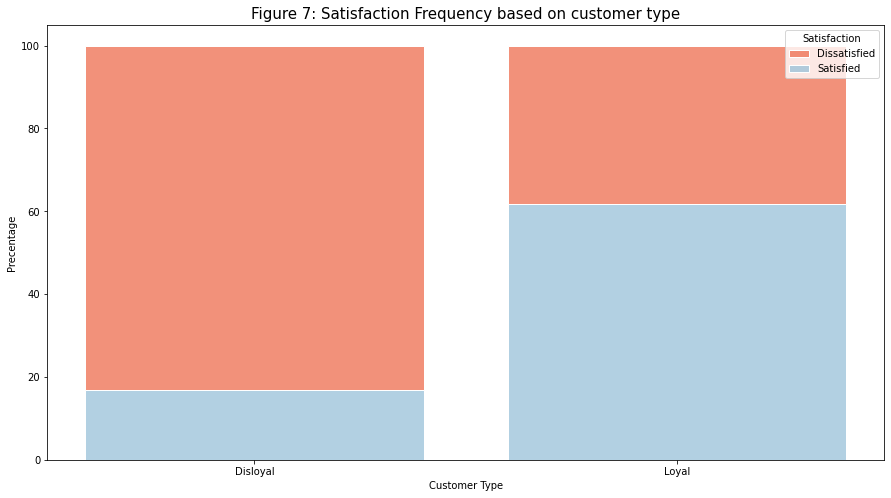

In [336]:

plt.figure(figsize=(15,8))
count = airplane_df.groupby(["Customer Type","Satisfaction"]).size().reset_index(name="frequency")
count_1 = count[0:2]
count_1['Percentage'] = (count_1.frequency / count_1.frequency.sum())* 100
count_2 = count[2:4]
count_2['Percentage'] = (count_2.frequency / count_2.frequency.sum())* 100
count = pd.concat([count_1,count_2])
sns.histplot(
    count,
    x='Customer Type',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='Percentage',
    hue='Satisfaction',
    multiple='stack',
    palette=['#ee6c4d', '#98c1d9'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
    
).set( xlabel="Customer Type", ylabel="Precentage")



plt.title('Figure 7: Satisfaction Frequency based on customer type', fontsize = 15);

### Figure 8: Box Plot of Age by Ease of Online booking
-   Through visual inspection it is evident tht age has minimal impact on Ease of Online Booking.
-   Therefore, we can assume that all groups Age groups are able to use the online booking service faily equally

<Figure size 1080x576 with 0 Axes>

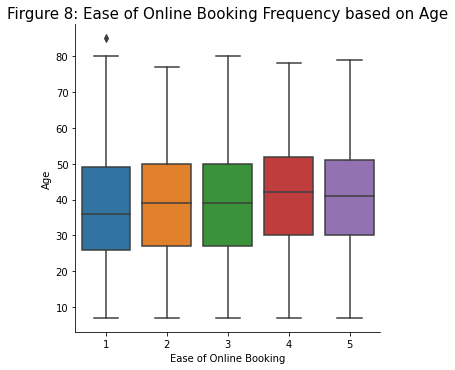

In [354]:
plt.figure(figsize = (15,8))
g =sns.catplot(x = "Ease of Online Booking", y = "Age", kind = 'box', data=airplane_df, ci = None)
plt.title('Firgure 8: Ease of Online Booking Frequency based on Age', fontsize = 15);


ax = g.facet_axis(0, 0)

# Adding Data Labels
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show();

## Three-variable plots <a name="3v"></a>

### Figure 9: Faceted barplot of seat comfort effect on satisfaction across class
- The barplot shows for business class passengers that as seat comfort increases they are more likely to be satisfied. However, Business class passengers are likely to be satisfied regardless of seat comfort.
- Only in economy is it likely that passengers will be satisfied if they are also satisfied with seat comfort

Text(0.5, 0.98, 'Figure 9: Faceted barplot of leg room service by seat comfort and satisfaction')

<Figure size 1440x1440 with 0 Axes>

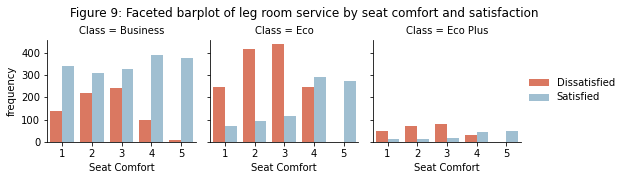

In [368]:
#Seat comfort rating vs class
plt.figure(figsize = (20,20))
count1 = airplane_df.groupby(["Seat Comfort", "Class", "Satisfaction"]).size().reset_index(name="frequency")
plot = sns.FacetGrid(count1, col="Class", height=2.5, col_wrap=3)
plot.map_dataframe(sns.barplot, x="Seat Comfort",y ="frequency" ,hue="Satisfaction",palette=['#ee6c4d', '#98c1d9'])
plot.fig.subplots_adjust(top=0.8)
plot.add_legend() 
plot.fig.suptitle('Figure 9: Faceted barplot of leg room service by seat comfort and satisfaction')


### Figure 10: Side-by-side boxplots of Flight Distance by Satisfaction and Age group
 - As seen in figure 10 below as the age group increases so does the disparity in mean and median flight distances between satisfied and dissatisfied customers from the ages 0 to 75.
- In the 25-35 age group , satisfied customers on average travel 201 km more , whilst in the 35-45 , 45-65 and 65-75 age groups satisfied customers travel on average 37 , 133 and 457 km less respectively than dissatisfied customers
- This proves that flight distance is a significant factor in determining satisfaction across all age groups especially in the older age groups

In [361]:
plt.figure(figsize = (15,8))
category = pd.cut(airplane_df.Age,bins=[0,18,25,35,45,65,75,99],labels=["0-18","18-25","25-35","35-45","45-65","65-75","75-..."])
airplane_df.insert(3,'Age Group',category)


<Figure size 1080x576 with 0 Axes>

Age Group  Satisfaction
0-18       Dissatisfied    2071.0
           Satisfied       2014.0
18-25      Dissatisfied    2084.0
           Satisfied       2198.0
25-35      Dissatisfied    2074.5
           Satisfied       2229.0
35-45      Dissatisfied    1787.0
           Satisfied       1810.0
45-65      Dissatisfied    1776.0
           Satisfied       1565.0
65-75      Dissatisfied    1672.0
           Satisfied        750.5
75-...     Dissatisfied    1858.5
           Satisfied       1793.0
Name: Flight Distance, dtype: float64
Age Group  Satisfaction
0-18       Dissatisfied    2192.318182
           Satisfied       2170.707182
18-25      Dissatisfied    2219.184659
           Satisfied       2484.960784
25-35      Dissatisfied    2247.225000
           Satisfied       2448.955257
35-45      Dissatisfied    1864.095541
           Satisfied       1827.601379
45-65      Dissatisfied    1761.595000
           Satisfied       1628.595608
65-75      Dissatisfied    1649.376471
         

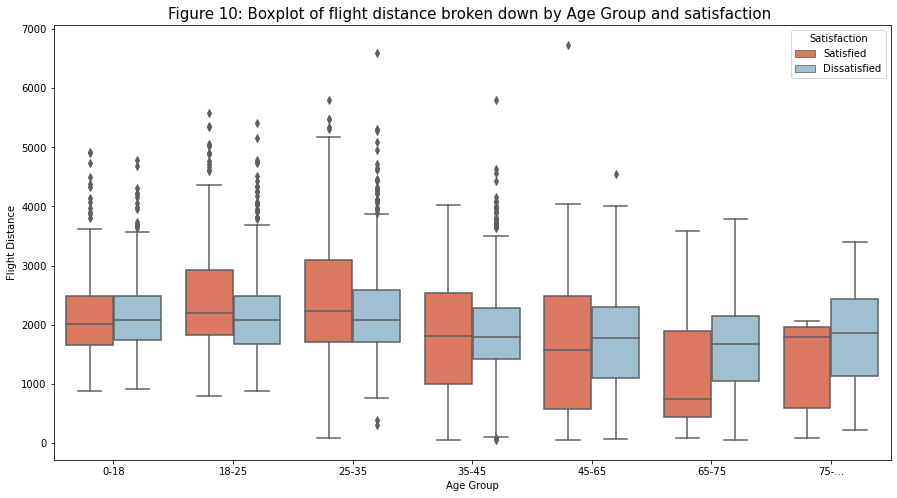

In [362]:

plt.figure(figsize = (15,8))
sns.boxplot(airplane_df['Age Group'], airplane_df['Flight Distance'],hue=airplane_df['Satisfaction'],palette=['#ee6c4d', '#98c1d9'])
plt.title('Figure 10: Boxplot of flight distance broken down by Age Group and satisfaction ', fontsize = 15)

medians = airplane_df.groupby(['Age Group','Satisfaction'])['Flight Distance'].median()
means = airplane_df.groupby(['Age Group','Satisfaction'])['Flight Distance'].mean()
print(medians)
print(means)

### Figure 11: Faceted barplot of leg room service by seat comfort and satisfaction

- Passengers who rated seat comfort highly generally also rated the legroom service highly while also being satisfied with their flight
- This suggests having good leg room service results in also having good seat comfort
- Similarly, passengers who rated the leg room as neutral or less were more likely to rate seat comfort more poorly and be dissatisfied with their flight

Text(0.5, 0.98, 'Figure 11: Faceted barplot of leg room service by seat comfort and satisfaction')

<Figure size 1080x576 with 0 Axes>

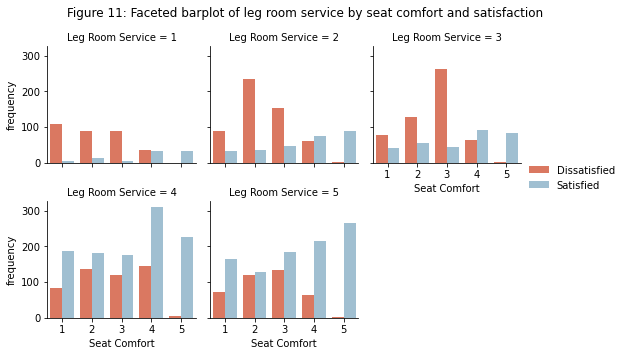

In [360]:
#Seat comfort rating vs leg room service vs satisfaction
plt.figure(figsize = (15,8))
count1 = airplane_df.groupby(["Seat Comfort", "Leg Room Service", "Satisfaction"]).size().reset_index(name="frequency")
plot = sns.FacetGrid(count1, col="Leg Room Service", height=2.5, col_wrap=3)
plot.map_dataframe(sns.barplot, x="Seat Comfort",y ="frequency" ,hue="Satisfaction",palette=['#ee6c4d', '#98c1d9'])
plot.fig.subplots_adjust(top=0.87)
plot.add_legend() 
plot.fig.suptitle('Figure 11: Faceted barplot of leg room service by seat comfort and satisfaction')



### Figure 12: Side by side Boxplots of onboard service by age

- Here there is a fairly even distribution of age and how passengers rated their inflight service
- It is evident that there is a minimal variation and thus effect of on-board service & age in comparison to Satisfaction.
- This indicates age does not affect the way passengers value in flight service

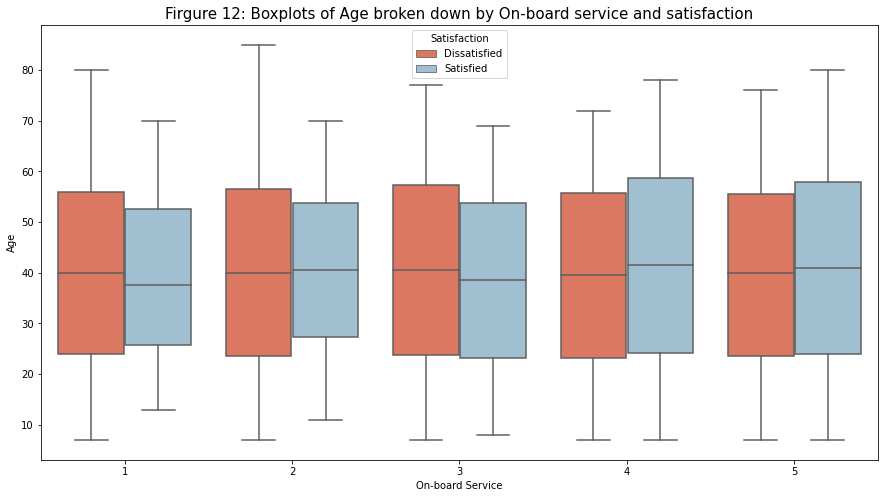

In [364]:
plt.figure(figsize = (15,8))
count1 = airplane_df.groupby(["Age", "On-board Service", "Satisfaction"]).size().reset_index(name="frequency")
a = sns.boxplot(data= count1, x="On-board Service", y = "Age", hue= "Satisfaction",palette=['#ee6c4d', '#98c1d9'])
#sns.catplot(data = count1, x = "Seat comfort", y = "frequency", col= "Leg room service", kind = "bar", hue= "Satisfaction")
plt.title('Firgure 12: Boxplots of Age broken down by On-board service and satisfaction', fontsize = 15);
plt.show(a);


<span style='font-family:"Times New Roman"'> 

# Literature Review: <a name="lr"></a>

Survival and being able to maintain market-share in an industry as competitive as the airline industry is a feat that has become primarily dependent on the perceived quality of passenger service (Walia, 2021) . (Prentice & Correia Loureiro, 2017) Proposes the importance of customer satisfaction has increased exponentially with the adoption of various digital medias as the views of satisfied and dissatisfied customers spread rapidly, meaning customer satisfaction has the potential to make or break a buisness by increasing its profitability or tarnishing the reputation of the airlines themselves. As presented in (Fadi et al., 2020) , service quality has been found to be an essential factor in the makeup of an airlines image, acting as an alternative form of advertisement. Maintaining this positive company image has ultimately been found necessary to maintain customer attention and uniqueness in an already saturated market (Ah-Hyun & Park, 2020). In addtion to overall company image, studies conducted by (Lainamngern & Sawmong, 2019)  ,  (Namukasa, 2013)  and (Karunaratna A.C & Wickramaratne C, 2018) all report that perceived and actual service quality is also directly and positively correlated with passenger satisfaction, which inturn exhibits the same relationship with passenger loyalty as demonstrated in *figure 1* below. 



<center><img src="fig1.png" width=500 height=200 /> 

*fig 1.*</center>

Passenger loyalty is an immensely derisible consumer characteristic as it is heavily associated with consumer behaviours such as word-of-mouth, repurchase intention and positive feedback to the service provider (Saha & Theingi, 2009). Meaning, a loyal customer is much more likely to refer and spread positive comments on the service itself and much more willing to buy the service again, increasing profitability overall. Measuring the service quality from the consumers perspective is therefore essentials for airline companies to influence the behavioural intentions of their consumer base. Using customer relationship strategies coupld with machine learning models allows airlines to break down this complex concept of service quality and customer satisfaction into more tangible subclasses: 
    
    (1)	Which service features have the strongest and weakest correlation with customer satisfaction?
    (2)	What is the most influential and financially viable service recovery method?
    (3)	Which features can be restricted without reducing overall customer satisfaction? 
    (4)	What customer characteristics are strongly associated with loyalty and satisfaction?
1.	This allows airline companies to help mitigate and identify possible or even upcoming points of service failures which will have the most devastating effects on customer satisfaction, allowing for a more targeted approach. As pain points are undoubtably always going to arise, having a good recovery strategy in place in these areas is highly recommended by (Ali et al., 2020) to reduce overall customer dissatisfaction and increase retention. 

2.	As competitive airlines are always looking for areas of possible future investments that will be the most impactful in terms of customer retention and satisfaction, understating the most viable route for these investments allows these companies to make business decisions informed via the customers perspective(Tsafarakis et al., 2018). As customer satisfaction is a dynamic parameter that changes based on multiple societal and market influences a system which can categorise perceived service quality shortcomings as they change is ideal. 

3.	Being able to identify the general customers level of tolerance in terms of the received standard of service allows airlines to direct resources away from areas that do not substantially reduce overall satisfaction so that they can be invested in more viable areas. (Johnston, 1995) 

4.	These features allow for airline to create more successful customer profiles which accurately represent their most profitable consumer bases. In general, this allows for more targeted marketing campaigns which is proven to greatly increase purchase intent (Camilleri, 2018).

Many classification algorithms have already been implemented and easily exhibit the capability of correctly predicting overall travel satisfaction with probabilities as high as 95.92% (Hayadi et al., 2021). These algorithms such as those demonstrated in (Kumar & Zymbler, 2019) and (Park et al., 2022) are capable of categorising customer and service features based on  overall satisfaction and subsequently model the complex relationships these features have with each other to aid in making more data-driven business decisions in the airline industry. Therefore, the application and implementation of Machine learning models have proven to be a significant tool in being able to identify, classify and predict the major factors contributing to customer satisfaction.

<span styel=''>


<span style='font-family:"Times New Roman"'> 

### Summary & conclusion: <a name="sum"></a>
<span styel=''>


Being able to comprehensively understand the factors that directly relate to customer satisfaction is a crucial feature in a service driven industry like the airline industry, as it allows for companies to make important resource management and marketing decisions with the customers perspective in mind. A model that reliably predicts a customer’s satisfaction based on survey results and customers features would be instrumental in creating a compressive customer-focused business strategy. Our goal for this project is to attempt to create a model for predicting whether a customer is satisfied or not using the airline satisfaction dataset and analyse its reliability. 

The main components of the first phase of this project are data preparation which involves cleaning and pre-processing our data and data visualisation to further explore the data. We first dropped the `id`’ variable as its contents is redundant for our task. We then checked the data for missing values which were found to be present in the `arrival delay` variable and were subsequently imputed as they account for less than 5% of the data (0.3%). Outliers were then also identified and removed in the `Flight Distance`, `Departure Delay in Minutes and Arrival Delay in Minutes` variables. Finally , in order to reduce the computational intensity of our data we randomly sampled 5000 rows from the initial dataset.

Several one, two and three variable visualisations were generated to get a greater understanding of the dataset. These visualisations show there is more satisfied passengers compared to neutral or dissatisfied. Key findings from the visualisations is that customers who fly buisness class are far more likely to be satisfied while passengers in economy class are far more likely to be dissatisfied. It was also found that passengers loyal to the airline were far more likely to be satisfied with their flight compared to disloyal passengers. It was found that flight distance had little impact on whether passengers were satisfied or not. Particularly amoungst the various age groups, flight distance had a very similar impact on satisfaction for all age groups. It was found that generally customers who rated the leg room service highly on the flight also rated the overall seat comfort highly as well. We found that age generally had little impact on whether a customer will be satisffied or not while class had a much bigger impact.

<span style='font-family:"Times New Roman"'> 

### References: <a name="ref"></a>


1. Ah-Hyun, O. H., & Park, H.-Y. (2020). Marketing Strategies for Improving Customer Attitude Using Airline Advertising Model: Focusing on Corporate Image and Brand Loyalty. Journal of Distribution Science, 18(4), 13–26. https://doi.org/10.15722/JDS.18.4.202004.13
2. Ali, S. R. O., Said, N. S. M., Jislan, F., Mat, K. A., & Aznan, W. N. M. W. (2020). The Relationship between Service Failure and Service Recovery with Airline Passenger Satisfaction. Journal of Physics: Conference Series, 1529(2), 022062. https://doi.org/10.1088/1742-6596/1529/2/022062
3. Camilleri, M. A. (2018). Market Segmentation, Targeting and Positioning. 69–83. https://doi.org/10.1007/978-3-319-49849-2_4
4. Fadi, A., Khalid, D., Akram, S., & Abrar, A. (2020). Drivers of Customer Satisfaction in Airline Industry in (The) Sultanate of Oman: A Conceptual Study. 13th Annual Conference of the EuroMed Academy of Business.
5. Hayadi, B. H., Kim, J.-M., Hulliyah, K., & Sukmana, H. T. (2021). Predicting Airline Passenger Satisfaction with Classification Algorithms. International Journal of Informatics and Information Systems, 4(1), 82–94. https://doi.org/10.47738/IJIIS.V4I1.80
6. Johnston, R. (1995). The zone of tolerance Exploring the relationship between service transactions and satisfaction with the overall service. International Journal of Service Industry Management, 6(2), 46–61. https://doi.org/10.1108/09564239510084941/FULL/PDF
7. Karunaratna A.C, & Wickramaratne C. (2018). The Impact of Service Quality on Passenger Satisfaction in Airport Services: A Case on International Passengers. Proceedings of the 7 Th International Conference on Management and Economics.
8. Kumar, S., & Zymbler, M. (2019). A machine learning approach to analyze customer satisfaction from airline tweets. Journal of Big Data, 6(1), 1–16. https://doi.org/10.1186/S40537-019-0224-1/TABLES/4
9. Lainamngern, S., & Sawmong, S. (2019). How customer relationship management, perceived risk, perceived service quality, and passenger trust affect a full-service airline’s passenger satisfaction. Journal of Business and Retail Management Research (JBRMR), 13. www.jbrmr.com
10. Namukasa, J. (2013). The influence of airline service quality on passenger satisfaction and loyalty the case of Uganda airline industry. TQM Journal, 25(5), 520–532. https://doi.org/10.1108/TQM-11-2012-0092/FULL/PDF
11. Park, S. H., Kim, M. Y., Kim, Y. J., & Park, Y. H. (2022). A Deep Learning Approach to Analyze Airline Customer Propensities: The Case of South Korea. Applied Sciences 2022, Vol. 12, Page 1916, 12(4), 1916. https://doi.org/10.3390/APP12041916
12. (PDF) An Analysis of the Impact of Service Quality and Passenger Satisfaction on Passenger Preference for Airlines : A Study of the Indian Aviation Sector. (n.d.). Retrieved April 5, 2022, from https://www.researchgate.net/publication/301678370_An_Analysis_of_the_Impact_of_Service_Quality_and_Passenger_Satisfaction_on_Passenger_Preference_for_Airlines_A_Study_of_the_Indian_Aviation_Sector
13. Prentice, C., & Correia Loureiro, S. M. (2017). An asymmetrical approach to understanding configurations of customer loyalty in the airline industry. Journal of Retailing and Consumer Services, 38, 96–107. https://doi.org/10.1016/J.JRETCONSER.2017.05.005
14. Saha, G. C., & Theingi. (2009). Service quality, satisfaction, and behavioural intentions: A study of low-cost airline carriers in Thailand. Managing Service Quality, 19(3), 350–372. https://doi.org/10.1108/09604520910955348/FULL/PDF
15. Tsafarakis, S., Kokotas, T., & Pantouvakis, A. (2018). A multiple criteria approach for airline passenger satisfaction measurement and service quality improvement. Journal of Air Transport Management, 68, 61–75. https://doi.org/10.1016/J.JAIRTRAMAN.2017.09.010
 
<span styel=''>